<center>
<h1>Biomed Challenge Starting Kit</h1>
<br>This code was tested with <br>
Python 2.7 | Anaconda 2.2.0 64-bit (https://anaconda.org/)<br>
</center>
<p><br>


</div>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE.

# Introduction

Opioids is a small standard binary-class classification data set from the <a href="https://www.kaggle.com/apryor6/us-opiate-prescriptions">Kaggle Dataset Repository</a>, formatted in the AutoML format.

In [19]:
model_dir = 'my_code/'          
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Step 1: Exploratory data analysis
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the opioid_prescribers dataset from the repository.

In [20]:
datadir = 'public_data'              # Change this to the directory where you put the input data
dataname = 'Opioids'
#!dir $datadir*

For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [21]:
from data_io import read_as_df
data = read_as_df(datadir  + '/' + dataname) 

Reading public_data/Opioids_train from AutoML format
Number of examples = 15000
Number of features = 243
Number of labels = 1


In [22]:
data.head()

,Gender,State,Credentials,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Target
0,0,21,3,5,0,18,0,0,48,49,...,0,0,0,12,74,0,32,0,29,1
1,0,2,2,5,25,20,55,0,48,81,...,0,34,0,0,143,0,0,17,81,1
2,1,40,1,3,0,0,0,0,14,20,...,0,0,0,0,0,0,0,0,0,1
3,1,24,12,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,30,2,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
data.describe() 

,Gender,State,Credentials,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Target
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000
mean,0.378267,18.622600,30.522400,10.794067,3.307000,1.020800,6.970333,0.676867,8.855733,9.239600,...,2.107733,2.233200,2.535400,0.759267,19.576000,3.350933,4.072067,1.19900,11.467867,0.588267
std,0.484971,13.140389,104.279229,9.773899,21.997226,6.152124,26.287433,5.126019,35.800527,28.997301,...,9.622247,14.533372,25.788233,4.602759,86.879149,17.244864,19.074987,11.57387,37.226170,0.492164
min,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,7.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,18.000000,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
75%,1.000000,28.000000,15.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
max,1.000000,52.000000,885.000000,43.000000,770.000000,206.000000,1105.000000,275.000000,2431.000000,449.000000,...,520.000000,902.000000,1814.000000,143.000000,5316.000000,596.000000,772.000000,694.00000,1707.000000,1.000000


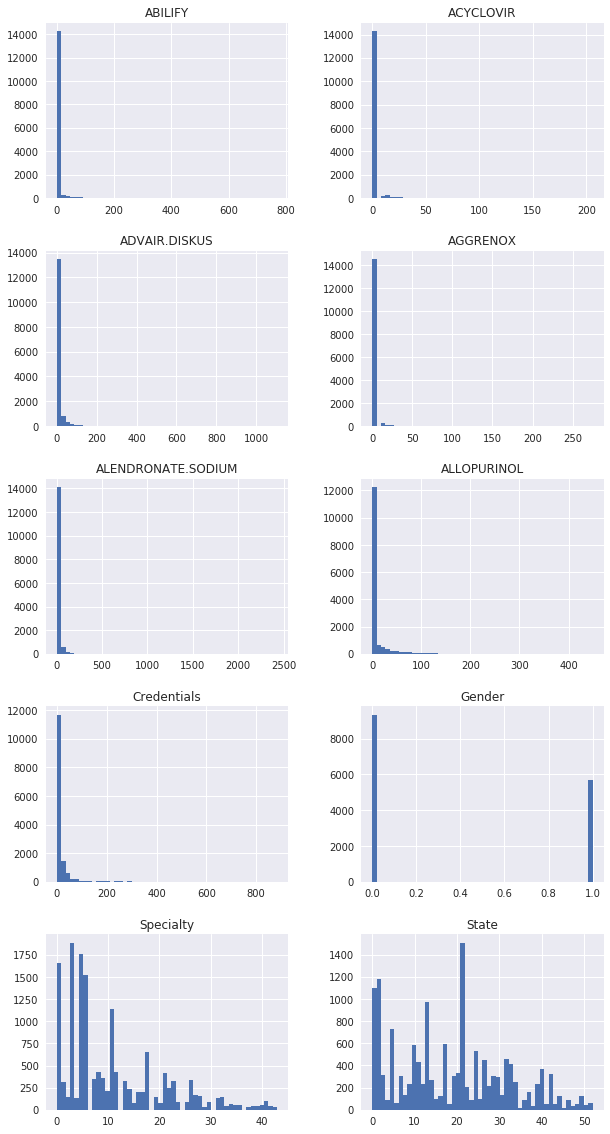

In [24]:
data[data.columns[:10]].hist(figsize=(10, 20), bins=50, layout=(5, 2)); 

## Categorical Features' and Target's distributions 

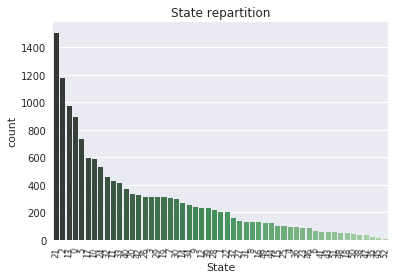

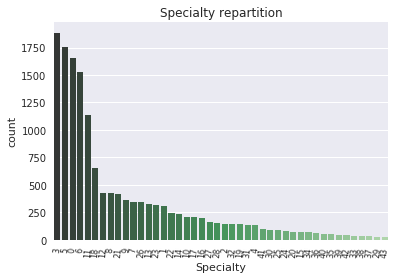

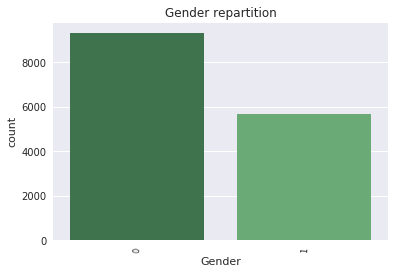

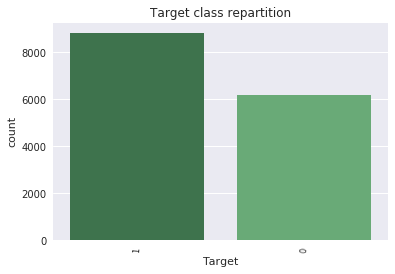

In [25]:
#import numpy as np
#cols = data.columns[:10]
#sns.pairplot(data[np.append(cols,"Opioid.Prescriber")], hue="Opioid.Prescriber")

import matplotlib.pyplot as plt
def plot_dist(data, feat, title):
    g = plt.figure()
    sns.countplot(x=feat, data= data, order = data[feat].value_counts().index,palette="Greens_d")
    plt.xticks(rotation=85, fontsize = 8)
    plt.title(title)
    plt.show()
    
plot_dist(data, "State", "State repartition")
plot_dist(data, "Specialty", "Specialty repartition")
plot_dist(data, "Gender", "Gender repartition")
plot_dist(data, "Target", "Target class repartition")

# Step 2: Building a predictive model

## Loading data with DataManager
We reload the data with the AutoML DataManager class because this is more convenient:

In [26]:
from data_manager import DataManager  
D = DataManager(dataname, datadir, replace_missing=True)
print D

Info file found : /home/simon/Bureau/MiniProjet/SANTE-mini-projet/public_data/Opioids_public.info
DataManager : Opioids
info:
	task = binary.classification
	name = Opioids
	feat_type = Numerical
	format = dense
	is_sparse = 0
	metric = auc_metric
	target_type = Numerical
	test_num = 20
	label_num = 2
	target_num = 2
	valid_num = 20
	has_categorical = 1
	usage = Sample dataset Opioids data
	feat_num = 243
	time_budget = 1200
	train_num = 20
	has_missing = 0
data:
	X_train = array(15000, 243)
	Y_train = array(15000,)
	X_valid = array(5000, 243)
	X_test = array(5000, 243)
feat_type:	array(243,)
feat_idx:	array(0,)



## Training a predictive model
We provide an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Replace it with your own model.

In [29]:
from model import model
??model 

/home/simon/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/simon/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Create an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:

In [30]:
M = model()
trained_model_name = model_dir + dataname
M = M.load(trained_model_name)                  # Attempts to re-load an already trained model

Info file found : /home/simon/Bureau/MiniProjet/public_data/Opioids_public.info


Train and run your predictive model. If you have saved a trained model in sample_code_submission, the evaluation script will reload it and not retrain, just test. This will happen the second time you run the code because when the model is trained it gets saved. So delete iris_model.pickle from sample_code_submission if you do not want this to happen.

In [32]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']
if not(M.is_trained):    
    M.fit(X_train, Y_train)                     

Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

Save the trained model (will be ready to reload next time around) and save the prediction results:

In [33]:
M.save(trained_model_name)                 
result_name = 'sample_result_submission/' + dataname
from data_io import write
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
#!ls $result_name*

## Scoring the results
### Load the challenge metric
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. We use here the `mse_metric` metric (an example of organizer-supplied metric found in `my_metric.py`), which computes the mean-square-error. You may change that in the "metric.txt" file to e.g. use `bac_multiclass`, one of the AutoML challenge metrics found in `libscores.py`, which is 2*(balanced_accuracy)-1.

In [34]:
import my_metric
import libscores

In [35]:
with open(score_dir + '/metric.txt', 'r') as f:
    metric_name = f.readline().strip()
scoring_function = getattr(my_metric, 'auc_metric_')
print('Using scoring metric:', metric_name)
??scoring_function

('Using scoring metric:', 'auc_metric_')


### Training performance
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.

In [36]:
Y_train.ndim

1

In [37]:
print 'Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train)
print 'Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train)

Training score for the auc_metric_ metric = 0.9966
Ideal score for the auc_metric_ metric = 1.0000


### Other metrics
It is recommended to generally use `predict_proba` to get numeric predictions between 0 an 1. However, to compute the two metrics below, you need first to threshold them. </div>

In [38]:
y_hat_train = 1*(Y_hat_train>0.5)   # This turns the outputs to binary predictions 0/1
# Compute accuracy and confusion matrix:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print 'Training accuracy = %5.4f' % accuracy_score(Y_train, y_hat_train)
print 'Confusion matrix [known in lines, predicted in columns]=\n',confusion_matrix(Y_train, y_hat_train)

Training accuracy = 0.9983
Confusion matrix [known in lines, predicted in columns]=
[[6166   10]
 [  16 8808]]


### Cross-validation performance
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development.

In [39]:
from sklearn.model_selection import KFold
from numpy import zeros, mean
# 3-fold cross-validation
n = 3
kf = KFold(n_splits=n)
kf.get_n_splits(X_train)
i=0
scores = zeros(n)
for train_index, test_index in kf.split(X_train):
    Xtr, Xva = X_train[train_index], X_train[test_index]
    Ytr, Yva = Y_train[train_index], Y_train[test_index]
    M = model()
    M.fit(Xtr, Ytr)
    Yhat = M.predict(Xva)
    scores[i] = scoring_function(Yva, Yhat)
    print ('Fold', i+1, 'example metric = ', scores[i])
    i=i+1
print ('Average score = ', mean(scores))

Info file found : /home/simon/Bureau/MiniProjet/public_data/Opioids_public.info
FIT: dim(X)= [10000, 243]
FIT: dim(y)= [10000, 1]
('Fold', 1, 'example metric = ', 0.64388497439845893)
Info file found : /home/simon/Bureau/MiniProjet/public_data/Opioids_public.info
FIT: dim(X)= [10000, 243]
FIT: dim(y)= [10000, 1]
('Fold', 2, 'example metric = ', 0.63881695204057221)
Info file found : /home/simon/Bureau/MiniProjet/public_data/Opioids_public.info
FIT: dim(X)= [10000, 243]
FIT: dim(y)= [10000, 1]
('Fold', 3, 'example metric = ', 0.60510128824678655)
('Average score = ', 0.62926773822860593)


# Step 3: Making a submission

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 

In [19]:
outdir = 'sample_result_submission'     

In [20]:
!python $problem_dir/ingestion.py $datadir $outdir $problem_dir $model_dir

Using input_dir: /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Winter2018/M2_AIC/3.final_website/Biomed2/starting_kit/sample_data
Using output_dir: /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Winter2018/M2_AIC/3.final_website/Biomed2/starting_kit/sample_result_submission
Using program_dir: /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Winter2018/M2_AIC/3.final_website/Biomed2/starting_kit/ingestion_program
Using submission_dir: /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Winter2018/M2_AIC/3.final_website/Biomed2/starting_kit/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Opioids ********
************************************************
========= Reading and converting data ==========
Info file found : /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Winter2018/M2_AIC/3.final_website/Biome

## Preparing the submission

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.